# DESCRIPTION


This dataset is composed of 1100 samples with 20 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 5 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of the
k-NearestNeighbors algorithm (implemented by
sklearn.neighbors.KNeighborsClassifier) with that of a Random Forest
(implemented by sklearn.ensemble.RandomForestClassifier). Try to optimize both
algorithms' parameters and determine which one is best for this dataset. At the
end of the analysis, you should have chosen an algorithm and its optimal set of
parameters: write this choice explicitly in the conclusions of your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

# Setup


First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tarfile
import pandas as pd
from sklearn.preprocessing import StandardScaler


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get and visualize the Data

In [2]:
data = pd.read_csv("mldata_0023123212.csv")
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0,2,-1.383194,10.020191,-2.078526,-2.489089,1.823480,3.127534,-3.651818,-3.334757,...,0.446038,0.053078,-0.324458,-3.373395,-2.744355,3.271828,1.466759,6.472721,-0.104789,-2.214484
1,1,2,4.602452,-7.825184,3.895465,6.537177,-1.056536,1.364898,0.118355,-2.378352,...,2.336646,0.718642,6.499269,5.674899,-0.772810,-7.357295,-1.807241,-3.096734,-6.486363,3.320606
2,2,0,4.264195,1.944642,1.594646,1.157688,-1.911011,2.659665,-1.324765,-0.551189,...,3.895024,2.720971,4.487895,3.499413,-2.783858,-2.328802,-0.650420,2.327455,-1.147618,-0.649045
3,3,2,-3.084724,3.137119,-1.539771,-2.015874,-0.150169,0.271033,-0.383396,-0.931025,...,-1.202603,-1.909417,-2.713500,-1.823864,-0.072031,1.834487,2.697557,2.840558,2.491956,0.698037
4,4,0,1.780063,-0.467537,2.277703,1.456986,0.008420,2.637371,-0.885162,2.172643,...,3.787470,-1.250550,1.683876,3.088516,-0.645237,-1.106989,-0.979782,-0.920561,-2.072367,-0.680748


We drop the first column as we don't need it:

In [3]:
data.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
data.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,2,-1.383194,10.020191,-2.078526,-2.489089,1.823480,3.127534,-3.651818,-3.334757,-1.087237,...,0.446038,0.053078,-0.324458,-3.373395,-2.744355,3.271828,1.466759,6.472721,-0.104789,-2.214484
1,2,4.602452,-7.825184,3.895465,6.537177,-1.056536,1.364898,0.118355,-2.378352,0.449493,...,2.336646,0.718642,6.499269,5.674899,-0.772810,-7.357295,-1.807241,-3.096734,-6.486363,3.320606
2,0,4.264195,1.944642,1.594646,1.157688,-1.911011,2.659665,-1.324765,-0.551189,0.232686,...,3.895024,2.720971,4.487895,3.499413,-2.783858,-2.328802,-0.650420,2.327455,-1.147618,-0.649045
3,2,-3.084724,3.137119,-1.539771,-2.015874,-0.150169,0.271033,-0.383396,-0.931025,-1.124977,...,-1.202603,-1.909417,-2.713500,-1.823864,-0.072031,1.834487,2.697557,2.840558,2.491956,0.698037
4,0,1.780063,-0.467537,2.277703,1.456986,0.008420,2.637371,-0.885162,2.172643,0.829259,...,3.787470,-1.250550,1.683876,3.088516,-0.645237,-1.106989,-0.979782,-0.920561,-2.072367,-0.680748


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1100 non-null   int64  
 1   feature_1   1100 non-null   float64
 2   feature_2   1100 non-null   float64
 3   feature_3   1100 non-null   float64
 4   feature_4   1100 non-null   float64
 5   feature_5   1100 non-null   float64
 6   feature_6   1100 non-null   float64
 7   feature_7   1100 non-null   float64
 8   feature_8   1100 non-null   float64
 9   feature_9   1100 non-null   float64
 10  feature_10  1100 non-null   float64
 11  feature_11  1100 non-null   float64
 12  feature_12  1100 non-null   float64
 13  feature_13  1100 non-null   float64
 14  feature_14  1100 non-null   float64
 15  feature_15  1100 non-null   float64
 16  feature_16  1100 non-null   float64
 17  feature_17  1100 non-null   float64
 18  feature_18  1100 non-null   float64
 19  feature_19  1100 non-null  

All data are numerical and there are not missing data. Therefore, we don't need any manipulation at this point.

In [5]:
data.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,1.986364,0.011866,-0.077746,0.004132,0.242691,-0.089509,0.170016,0.189403,0.255142,-0.414643,...,0.403139,-0.016679,0.231980,0.324504,-0.112340,0.324884,0.020941,0.069433,-0.298871,0.275764
std,1.436175,2.671379,3.420528,2.317117,2.559977,2.011721,1.840049,1.611664,1.915638,1.625358,...,3.125506,1.697491,3.190805,3.615560,1.742741,3.720064,1.772037,3.133257,2.676133,1.800942
min,0.000000,-10.327608,-11.709114,-9.431231,-8.641269,-6.123481,-5.570557,-5.276908,-5.760818,-7.194792,...,-9.541469,-6.354149,-13.697013,-9.856359,-6.338599,-10.587106,-6.561591,-11.617688,-8.794930,-6.595589
25%,1.000000,-1.621270,-2.328791,-1.559574,-1.595292,-1.417766,-0.976932,-0.811948,-1.045766,-1.511108,...,-1.670276,-1.119008,-1.851539,-2.261658,-1.244377,-2.055589,-1.144312,-1.865206,-2.026358,-0.905435
50%,2.000000,-0.088225,-0.029155,0.009356,0.056882,-0.122926,0.131757,0.253042,0.271472,-0.340409,...,0.268061,-0.029435,0.240994,0.456784,-0.131237,0.240788,-0.032667,0.135035,-0.285302,0.306955
75%,3.000000,1.664841,2.117745,1.532563,1.914598,1.185880,1.349240,1.274666,1.549469,0.726430,...,2.409772,1.099418,2.338288,2.824877,1.026540,2.611491,1.136960,2.083560,1.534295,1.496318
max,4.000000,9.779685,10.020191,6.984364,8.350856,7.979053,6.592232,5.131009,8.346820,5.017782,...,11.082015,7.100222,12.878107,12.127337,6.500533,16.353196,6.676978,10.705744,7.861903,7.228547


To make this notebook's output identical at every run:

In [6]:
np.random.seed(16)

We separate features and label:

In [7]:
features = data.iloc[:,1:]
label = data.iloc[:,:1]

Distribution of the targets:

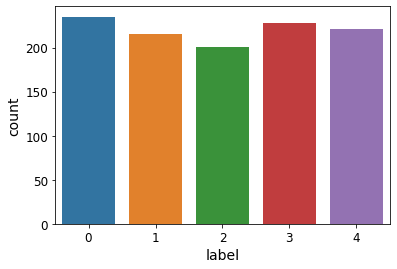

In [8]:
import seaborn as sns
sns.countplot(x = "label", data=data)
plt.show()

Labels look uniformly distributed between 0 and 4.

We now plot the distribution of the features:

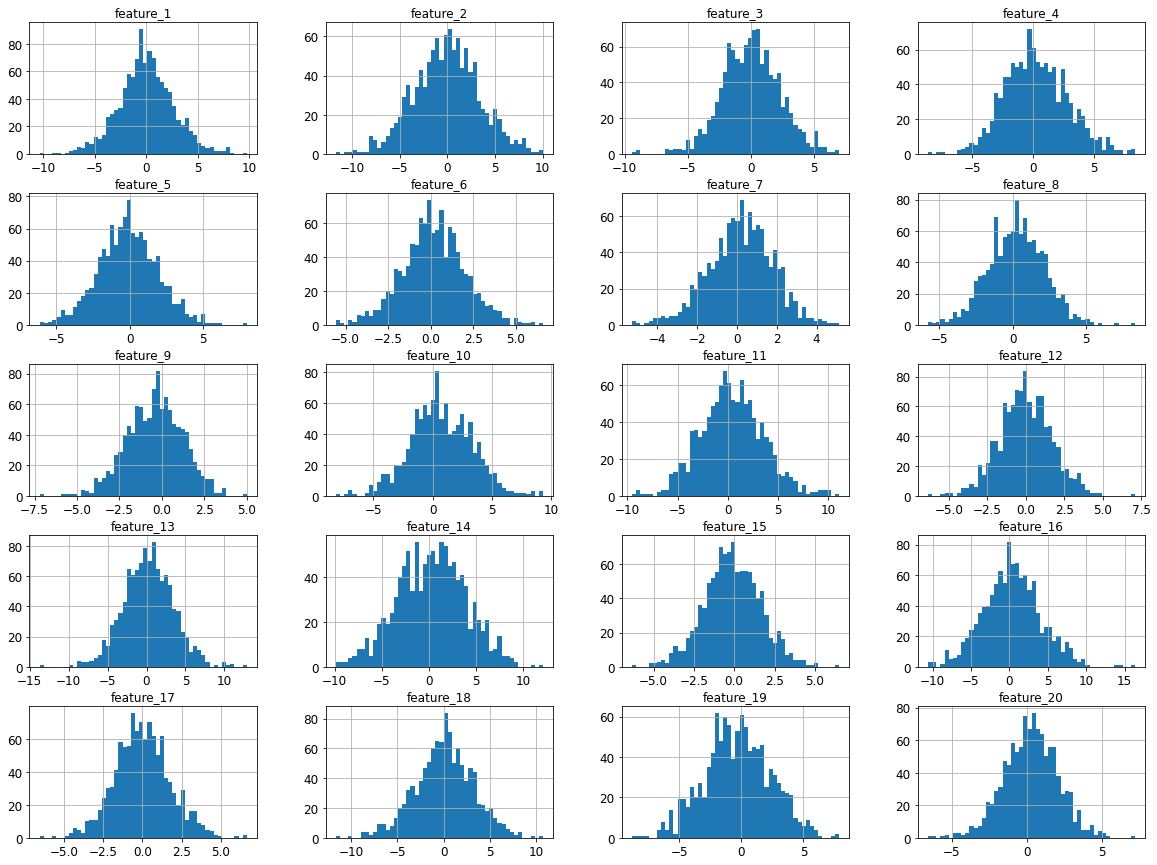

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
features.hist(bins = 50, figsize = (20,15))
plt.show()

Features seems to be distributed approximately as normal RVs.

# Prepare the Data for the Machine Learning models

We split the dataset into Training set and Test set. The code below puts 80% of the data in the training set and 20% in the test set:

In [10]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features,label,
                                                                                    test_size=0.20, random_state=16)
print(len(features_train), "train feature +", len(features_test), " test feature")

880 train feature + 220  test feature


In [11]:
features_train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,0.082805,-0.020950,0.082881,0.245834,-0.146830,0.190207,0.189705,0.280400,-0.409168,0.732009,0.386625,-0.071696,0.301075,0.313926,-0.182854,0.229001,0.039222,0.014451,-0.253751,0.224729
std,2.716678,3.464049,2.315851,2.587200,2.020027,1.867786,1.622463,1.917548,1.582460,2.590343,3.175909,1.727792,3.237486,3.690697,1.758371,3.758021,1.784865,3.168587,2.713216,1.817562
min,-10.327608,-11.709114,-9.431231,-8.641269,-6.123481,-5.545495,-5.276908,-5.760818,-7.194792,-7.167442,-9.541469,-6.354149,-13.697013,-9.856359,-6.338599,-10.587106,-6.561591,-10.011670,-8.794930,-6.595589
25%,-1.586104,-2.210438,-1.507732,-1.515133,-1.510007,-0.953715,-0.847035,-1.024311,-1.462477,-0.970302,-1.700866,-1.244103,-1.797221,-2.322175,-1.316208,-2.239040,-1.100198,-1.976210,-1.981761,-0.953449
50%,-0.055989,-0.008510,0.132865,0.032949,-0.141494,0.138068,0.253042,0.285627,-0.316265,0.573271,0.225985,-0.065856,0.343058,0.401798,-0.232646,0.139132,-0.024493,0.084774,-0.236568,0.258096
75%,1.784202,2.219311,1.600648,1.853102,1.130130,1.370473,1.288654,1.522554,0.670838,2.515112,2.475321,1.060284,2.488257,2.857374,0.953816,2.528676,1.157127,2.085280,1.637143,1.486336
max,8.318359,9.669931,6.984364,8.350856,6.127654,6.592232,5.131009,8.346820,5.017782,9.314946,11.082015,7.100222,12.878107,12.127337,6.500533,16.353196,6.676978,10.705744,7.641671,5.540040


We store the column names for later:

In [12]:
columns_names = list(features_train.columns)

We proceed by standardizing our features, which is a requirement for the optimal performance of many algorithms:

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train))
features_test = pd.DataFrame(scaler.transform(features_test))
features_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02
mean,7.065056e-18,-2.802367e-17,-1.513940e-18,5.756128e-19,3.532528e-18,-8.831320e-18,2.144749e-17,-6.812732e-18,-1.160688e-17,-3.406366e-17,7.317379e-17,-3.179275e-17,1.665335e-17,3.450523e-17,3.582992e-17,1.413011e-17,-8.074349e-18,8.326673e-18,-1.286849e-17,-1.715799e-17
std,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00,1.000569e+00
min,-3.834217e+00,-3.376052e+00,-4.110594e+00,-3.436980e+00,-2.960381e+00,-3.072602e+00,-3.371246e+00,-3.152283e+00,-4.290460e+00,-3.051311e+00,-3.127842e+00,-3.638184e+00,-4.326211e+00,-2.757222e+00,-3.502814e+00,-2.879775e+00,-3.700317e+00,-3.166024e+00,-3.149780e+00,-3.754588e+00
25%,-6.146690e-01,-6.324197e-01,-6.872281e-01,-6.810326e-01,-6.752149e-01,-6.127967e-01,-6.393552e-01,-6.807926e-01,-6.659931e-01,-6.575495e-01,-6.576633e-01,-6.789440e-01,-6.484937e-01,-7.146619e-01,-6.449144e-01,-6.571129e-01,-6.387422e-01,-6.286061e-01,-6.372483e-01,-6.485870e-01
50%,-5.111848e-02,3.593129e-03,2.159576e-02,-8.233045e-02,2.643167e-03,-2.793069e-02,3.905928e-02,2.727290e-03,5.874137e-02,-6.131535e-02,-5.060978e-02,3.382068e-03,1.297505e-02,2.382254e-02,-2.833331e-02,-2.392734e-02,-3.571795e-02,2.220634e-02,6.336686e-03,1.836888e-02
75%,6.266346e-01,6.470853e-01,6.557546e-01,6.215917e-01,6.325095e-01,6.322656e-01,6.777188e-01,6.481510e-01,6.828741e-01,6.887570e-01,6.580427e-01,6.555325e-01,6.759643e-01,6.895431e-01,6.468012e-01,6.122858e-01,6.266807e-01,6.539213e-01,6.973164e-01,6.945155e-01
max,3.033204e+00,2.799150e+00,2.981802e+00,3.134520e+00,3.107905e+00,3.429549e+00,3.047289e+00,4.209025e+00,3.431389e+00,3.315321e+00,3.369578e+00,4.153275e+00,3.887023e+00,3.202682e+00,3.803059e+00,4.293048e+00,3.721026e+00,3.376070e+00,2.911641e+00,2.926081e+00


Original names of columns are restored:

In [14]:
features_train.set_axis(columns_names, 
                    axis='columns', inplace=True)

features_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,-1.085538,0.765764,-0.695891,-0.469343,1.227507,0.537490,0.902729,1.574650,0.349962,0.180539,0.379289,1.003791,-0.901970,0.053561,1.037132,1.597082,-0.789381,-0.528199,-0.937186,-0.554580
1,0.254467,-1.147200,0.371198,-0.051364,-0.840627,-1.243326,0.868299,1.560130,0.100796,-0.418192,0.535730,1.003346,-0.331661,1.313362,1.621960,0.120923,-1.588092,-0.603363,-1.507043,-0.341477
2,-1.203791,2.799150,-0.758356,-0.740229,1.075305,0.712300,-1.274770,-1.332545,0.789160,0.537114,0.875494,-0.483871,-0.193534,-2.198074,-2.708113,1.185229,2.444947,1.686438,-0.251942,-2.726356
3,1.973428,-0.455306,-0.274641,1.489148,-1.314645,3.044402,-0.595091,-1.884832,-0.920996,1.748162,2.325788,0.402764,3.086713,1.235213,-1.165454,0.077315,0.340763,-1.042556,-1.366962,1.612766
4,-1.268769,1.492139,0.024246,-1.298050,2.917038,-0.422307,-1.814741,-0.056492,0.827207,0.123643,0.747878,1.349417,-1.433624,-0.482669,-0.486655,0.513257,1.104402,2.309249,1.189093,-1.452288


In [15]:
features_test.set_axis(columns_names, 
                    axis='columns', inplace=True)

features_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,-1.074343,0.349790,-0.027004,-0.549531,0.279572,-0.506952,0.528511,-0.026668,0.139958,-0.305059,-0.112448,0.413448,-0.916554,0.002606,0.130055,0.457148,1.071333,0.357913,0.197274,-0.617086
1,0.095063,0.629222,-1.034312,-0.349998,0.877733,1.060078,-1.771646,-0.657924,-0.821418,-0.098206,0.430404,0.581260,-0.043507,-0.295122,0.064864,0.294320,0.957537,0.328188,-0.803098,0.471303
2,-1.076398,-0.272210,-0.523264,-1.112903,0.326727,-1.393846,0.755563,0.527263,0.344164,-0.836731,-1.528983,-1.191839,-2.087081,-0.764207,1.881837,0.280831,-0.427103,0.254969,1.251266,0.435372
3,0.379996,-2.397726,-0.616664,0.528304,-0.956936,0.636375,1.664538,-0.974921,-1.236523,0.670036,-0.301481,0.479187,0.646476,1.829227,2.535516,0.169314,-0.472648,-1.496145,1.381755,3.855605
4,0.238651,0.549910,-0.088254,-0.221217,0.083553,-0.162244,0.248207,-1.394506,-0.682969,0.731225,-0.991447,-1.279808,-0.315279,-0.537808,0.785603,0.057580,-0.528071,-0.412345,0.636126,0.756964


Plots of features after standardization:

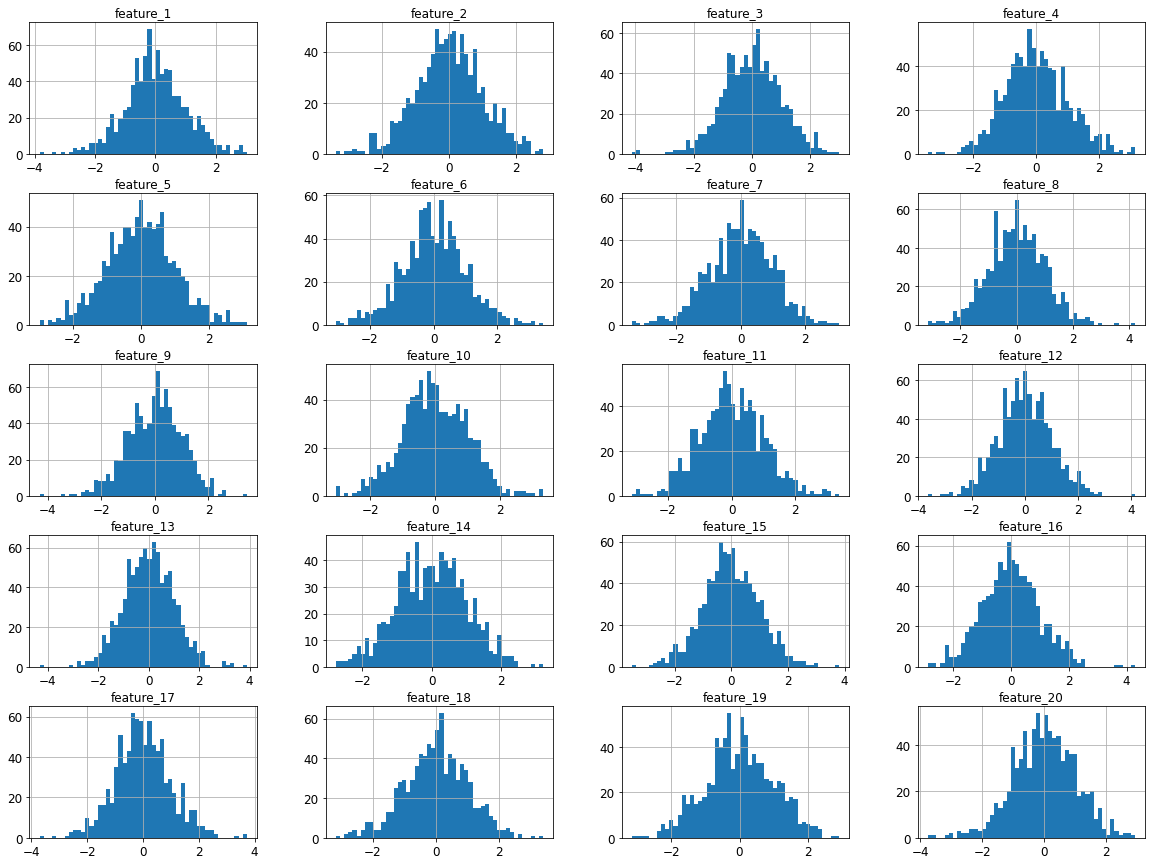

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
features_train.hist(bins = 50, figsize=(20,15))
plt.show()

The  Correlation matrix depicts the correlation between all the possible pairs of values in a table:

In [17]:
corr_matrix = features_train.corr()

<AxesSubplot:>

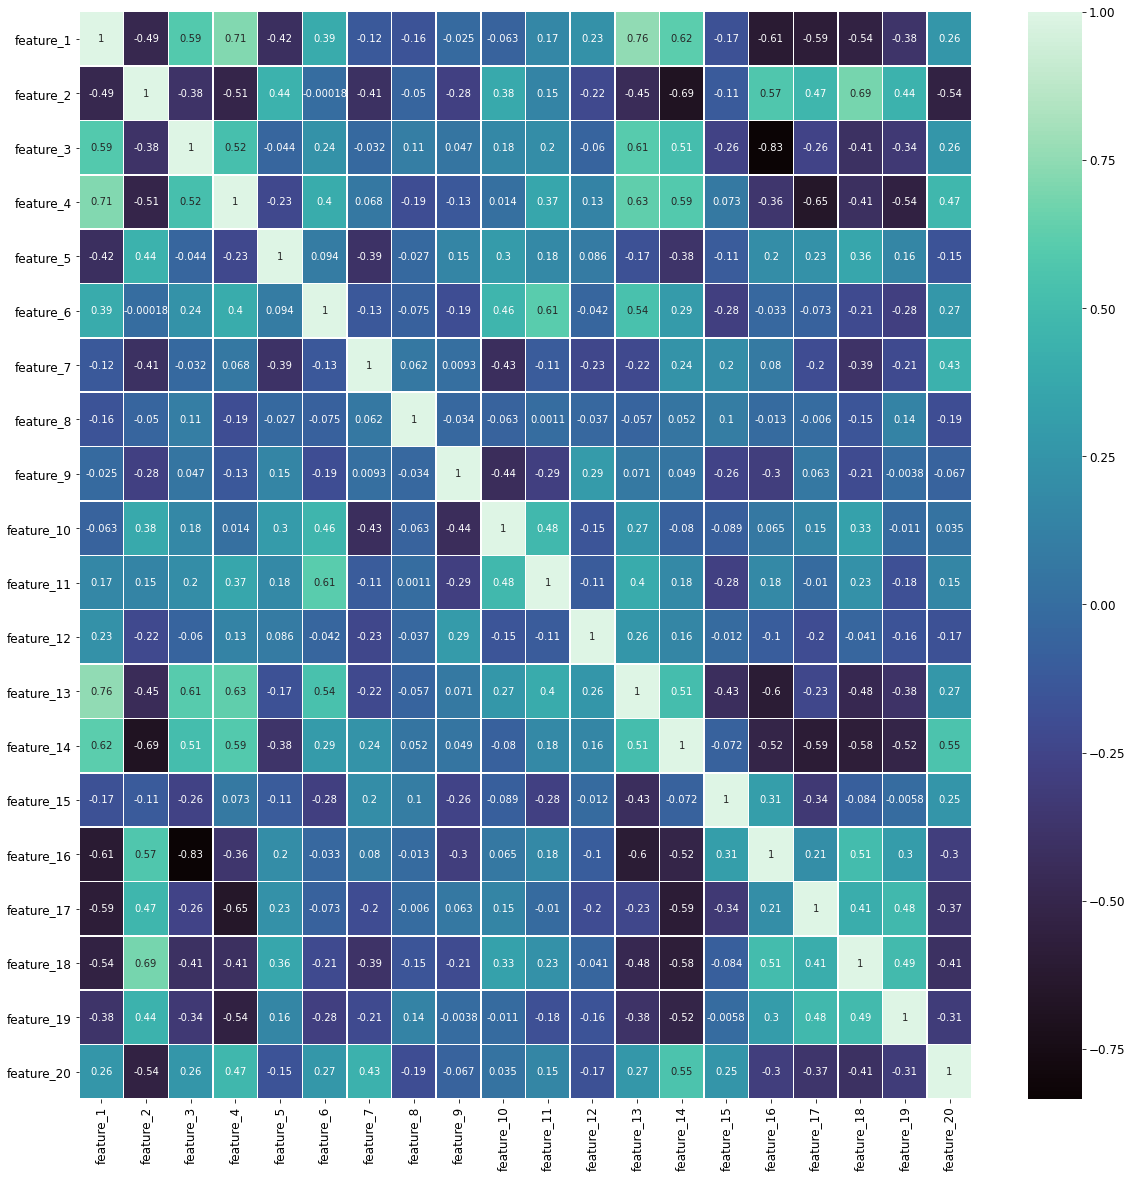

In [18]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True, linewidths=.5, cmap='mako')

We can see that there are no two features perfectly correted (corr = 1). At the same time, some features have a high degree of correlation (e.g. -0.83 between feature_16  and feature_3). We'll try to solve this issue later on.

# K-Nearest Neighbor Algorithm

Import necessary modules:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

**Training and test data accuracy**

Loop over k values and compute accuracy:

In [20]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, label_train.values.ravel())
    train_accuracy[i] = knn.score(features_train, label_train.values.ravel())
    test_accuracy[i] = knn.score(features_test, label_test.values.ravel())
 

Generate plot:

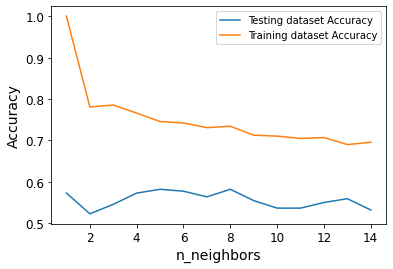

In [21]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

**Note:** This is a technique which is not used industry-wide to choose the correct value of n_neighbors. Instead, we do hyperparameter tuning to choose the value that gives the best performance:

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(features_train, label_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [23]:
gridsearch.best_params_

{'n_neighbors': 12}

The optimal parameter, computed through Grid Search, is 12. Therefore, we will run the K-Nearest Neighbor algorithm with this parameter:

In [24]:
opt_knn = KNeighborsClassifier(n_neighbors = 12)
 
opt_knn.fit(features_train, label_train.values.ravel())

KNeighborsClassifier(n_neighbors=12)

Predict on dataset which model has not seen before (test set):

In [25]:
print(opt_knn.predict(features_test))

[2 0 0 2 0 2 1 3 4 0 2 1 4 1 0 4 0 2 1 2 1 4 0 1 0 3 0 3 0 3 0 1 0 4 1 1 0
 1 1 0 1 3 1 0 4 1 0 3 0 2 3 2 3 1 2 2 0 1 2 4 4 1 1 0 3 0 3 3 0 1 2 1 4 4
 1 0 0 4 2 2 2 2 4 3 2 2 3 0 1 2 2 2 2 1 3 3 0 4 1 0 2 0 1 0 4 3 2 1 1 1 0
 3 3 4 0 4 2 3 0 4 1 0 3 3 3 1 0 1 3 3 0 1 1 3 0 3 1 2 1 2 3 2 1 3 3 4 0 1
 0 0 2 4 1 3 1 0 0 0 1 1 2 4 3 2 0 0 0 3 0 3 0 4 2 1 3 0 0 2 3 0 3 1 0 0 0
 0 1 0 2 0 2 2 2 2 2 1 2 3 1 0 3 0 3 3 0 2 0 0 1 3 2 3 4 0 4 3 1 0 2 0]


The following table compares Real Values and Predicted Values of our test set:

In [26]:
df_1 = pd.DataFrame({'Real Values': label_test.values.ravel(), 'Predicted Values':opt_knn.predict(features_test)})
df_1

,Real Values,Predicted Values
0,4,2
1,3,0
2,4,0
3,2,2
4,3,0
...,...,...
215,1,3
216,2,1
217,0,0
218,2,2


We compute the test mean squared error (for k = 12):

In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error
test_preds = opt_knn.predict(features_test)
mse = mean_squared_error(label_test, test_preds)
mse

2.4272727272727272

And we see graphically how it varies with k:

In [28]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train, label_train.values.ravel())
    pred_i = knn.predict(features_test)
    error.append(mean_squared_error(label_test, pred_i))

Text(0, 0.5, 'Mean Squared Error')

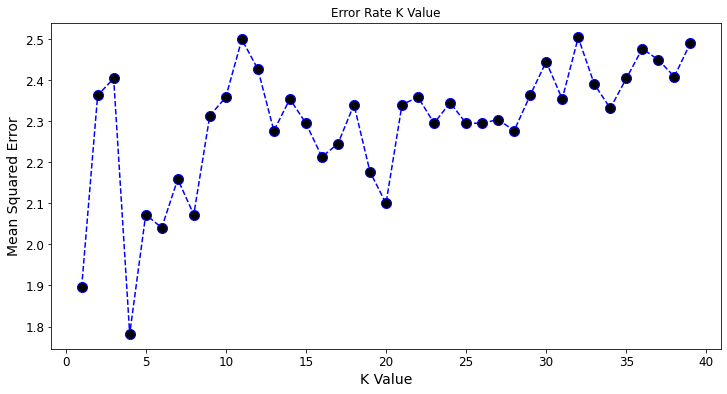

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')

# Random Forest Algorithm

In [30]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
rnd_clf = RandomForestClassifier(random_state = 16)
print('Parameters currently in use:\n')
pprint(rnd_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 16,
 'verbose': 0,
 'warm_start': False}


To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(40, 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [40,
                  90,
                  141,
                  191,
                  242,
                  292,
                  343,
                  393,
                  444,
                  494,
                  545,
                  595,
                  646,
                  696,
                  747,
                  797,
                  848,
                  898,
                  949,
                  1000]}


Now, we instantiate the random search and fit it: 

In [32]:
clf = RandomizedSearchCV(estimator = rnd_clf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose = 2, random_state = 16, n_jobs = -1)
model = clf.fit(features_train, label_train.values.ravel())
# print winning set of hyperparameters
model.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.8min finished


{'n_estimators': 494,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

The optimal parameters are those computed through RandomizedSearchCV:

In [33]:
opt_rnd_clf = RandomForestClassifier(n_estimators= 494,min_samples_split=2, min_samples_leaf=1,
                                     max_features= 'auto', max_depth= 70, bootstrap=True )
opt_rnd_clf.fit(features_train, label_train.values.ravel())

RandomForestClassifier(max_depth=70, n_estimators=494)

# Cross validation comparison

We perform a cross validation process on both algorithms (K-Nearest and Random Forest) to see which of them outputs the highest accuracy:

In [34]:
from sklearn.model_selection import cross_val_score

10-fold cross-validation with the best models; instead of saving 10 scores in object named score and calculating mean we're just calculating the mean directly on the results:

In [35]:
print('K-Nearest Neighbor accuracy =', cross_val_score(opt_knn, features_train, label_train.values.ravel(), cv=10, scoring='accuracy').mean())
print('Random forest accuracy =',cross_val_score(opt_rnd_clf, features_train, label_train.values.ravel(), cv=10, scoring='accuracy').mean())

K-Nearest Neighbor accuracy= 0.5897727272727272
Random forest accuracy= 0.5840909090909091


The result are very similar, but K-Nearest looks slightly better. We'll now perform some additional tests on both algorithms.

In [36]:
label_pred_rf = opt_rnd_clf.predict(features_test)
label_pred_knn = opt_knn.predict(features_test)

As we did above, we compare Real and Predicted Values, this time in the case of Random Forest:

In [37]:
df_2 = pd.DataFrame({'Real Values': label_test.values.ravel(), 'Predicted Values':label_pred_rf})
df_2

,Real Values,Predicted Values
0,4,2
1,3,0
2,4,4
3,2,2
4,3,1
...,...,...
215,1,2
216,2,2
217,0,0
218,2,2


We import some libraries to get results about our Random Forest algorithm, exploiting the test dataset:

In [38]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(label_test, label_pred_rf))
print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, label_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(label_test, label_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, label_pred_rf)))

Accuracy: 0.5454545454545454
Mean Absolute Error: 0.8954545454545455
Mean Squared Error: 2.159090909090909
Root Mean Squared Error: 1.4693845341131466


In [39]:
from sklearn.metrics import classification_report
print(classification_report(label_test, label_pred_rf))

              precision    recall  f1-score   support

           0       0.48      0.71      0.57        41
           1       0.39      0.45      0.42        33
           2       0.64      0.63      0.64        54
           3       0.67      0.41      0.51        58
           4       0.56      0.53      0.55        34

    accuracy                           0.55       220
   macro avg       0.55      0.55      0.54       220
weighted avg       0.57      0.55      0.54       220



To make it visuallly clearer, we print the "confusion matrix" for both K-Nearest and Random Forest:

Text(0.5, 1.0, 'KNN-Accuracy score: 0.55')

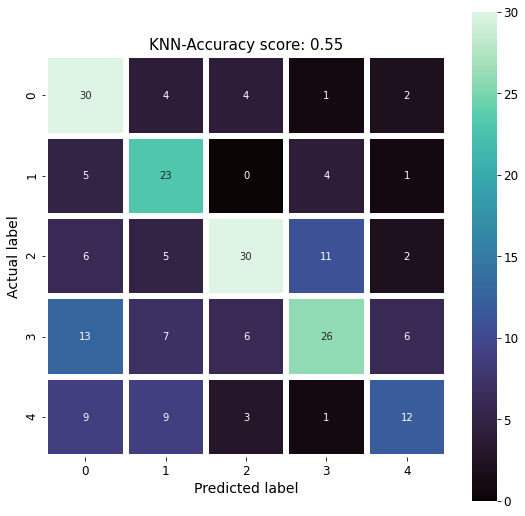

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matr = confusion_matrix(label_test, label_pred_knn)
acc = accuracy_score(label_test, label_pred_knn)

plt.figure(figsize = (9,9))
sns.heatmap(conf_matr, annot = True, fmt = ".0f", linewidths = 5, square = True, cmap = 'mako');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'KNN-Accuracy score: {0}'.format(acc)
plt.title(all_sample_title, size = 15)

Below, the Random Forest matrix:

Text(0.5, 1.0, 'RF-Accuracy score: 0.5454545454545454')

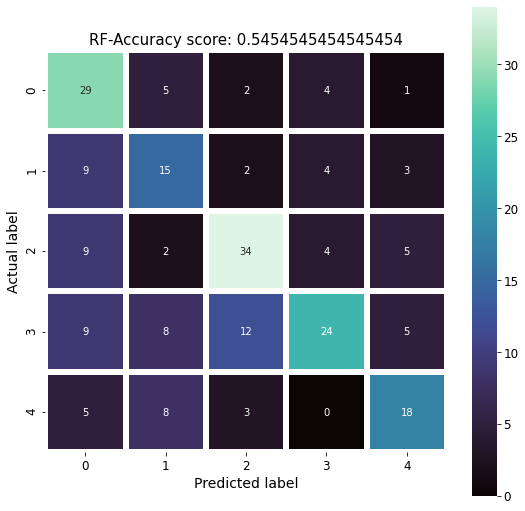

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matr = confusion_matrix(label_test, label_pred_rf)
acc = accuracy_score(label_test, label_pred_rf)

plt.figure(figsize = (9,9))
sns.heatmap(conf_matr, annot = True, fmt = ".0f", linewidths = 5, square = True, cmap = 'mako');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'RF-Accuracy score: {0}'.format(acc)
plt.title(all_sample_title, size = 15)

We now perfom the Feature importance test on the Random Forest algorithm:

In [42]:
features_names=np.array(columns_names)
feature_imp = pd.Series(opt_rnd_clf.feature_importances_,index=features_names).sort_values(ascending=False)
feature_imp

feature_11    0.072610
feature_18    0.061274
feature_19    0.055200
feature_8     0.054136
feature_16    0.054020
feature_7     0.053330
feature_17    0.051256
feature_20    0.049926
feature_10    0.049659
feature_14    0.049451
feature_5     0.049135
feature_12    0.047661
feature_2     0.046802
feature_4     0.046678
feature_3     0.046040
feature_6     0.043933
feature_13    0.043177
feature_15    0.042629
feature_1     0.041970
feature_9     0.041112
dtype: float64

graphically:

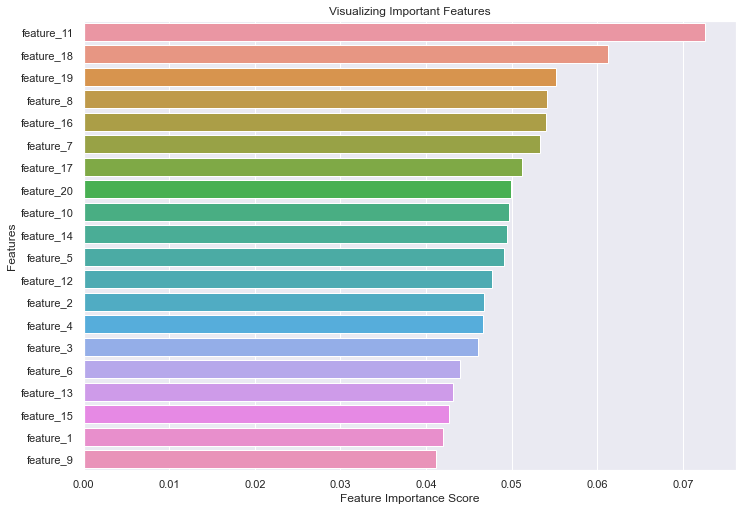

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# PCA (Bonus part)

In this section, we try to see if there is any improvement in the accuracy of our algorithms after a **Principal Component Analysis** is applied

In [44]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In such a way scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
We fit PCA on training set:

In [45]:
pca.fit(features_train)

PCA(n_components=0.95)

then, we apply the mapping to both the training set and the test set:

In [46]:
features_train_pca = pca.transform(features_train)
features_test_pca = pca.transform(features_test)

In [47]:
features_train_pca.shape

(880, 12)

We can see that the dimensionality of the dataset (the number of features) is reduced to 12 (before PCA it was 20).

# K-Nearest Neighbors with PCA

We rerun the same code as above, but now on tranformed data:

In [48]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(features_train_pca, label_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [49]:
gridsearch.best_params_

{'n_neighbors': 13}

In [50]:
opt_knn_pca = KNeighborsClassifier(n_neighbors = 13)
 
opt_knn_pca.fit(features_train_pca, label_train.values.ravel())

KNeighborsClassifier(n_neighbors=13)

In [51]:
df_3 = pd.DataFrame({'Real Values': label_test.values.ravel(), 'Predicted Values':opt_knn_pca.predict(features_test_pca)})
df_3

,Real Values,Predicted Values
0,4,2
1,3,0
2,4,0
3,2,2
4,3,0
...,...,...
215,1,3
216,2,1
217,0,0
218,2,2


In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_preds = opt_knn_pca.predict(features_test_pca)
mse = mean_squared_error(label_test, test_preds)
mse

1.990909090909091

In [53]:
print('K-Nearest Neighbor (PCA) accuracy=', cross_val_score(opt_knn_pca, features_train_pca, label_train.values.ravel(), cv=10, scoring='accuracy').mean())

K-Nearest Neighbor (PCA) accuracy= 0.594318181818182


We can conclude that after PCA, the K-Nearest Neighbor algorithm didn't gain much in accuracy (0.5943 v. 0.58977). 

# Random Forest with PCA

We repeat the same process also for Random Forest; again, we use tranformed data:

In [54]:
model_pca = clf.fit(features_train_pca, label_train.values.ravel())
# print winning set of hyperparameters
model_pca.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


{'n_estimators': 494,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [55]:
opt_rnd_clf_pca = RandomForestClassifier(n_estimators = 494, min_samples_split = 2, min_samples_leaf = 1,
                                     max_features = 'auto', max_depth = 70, bootstrap = True )
opt_rnd_clf_pca.fit(features_train_pca, label_train.values.ravel())

RandomForestClassifier(max_depth=70, n_estimators=494)

In [56]:
print('Random forest (PCA) accuracy=',cross_val_score(opt_rnd_clf_pca, features_train_pca, label_train.values.ravel(), cv=10, scoring='accuracy').mean())

Random forest (PCA) accuracy= 0.6318181818181817


In [57]:
label_pred_rf_pca = opt_rnd_clf_pca.predict(features_test_pca)
df_4 = pd.DataFrame({'Real Values': label_test.values.ravel(), 'Predicted Values':label_pred_rf_pca})
df_4

,Real Values,Predicted Values
0,4,4
1,3,1
2,4,4
3,2,2
4,3,3
...,...,...
215,1,3
216,2,3
217,0,0
218,2,2


Text(0.5, 1.0, 'Accuracy score: 0.6363636363636364')

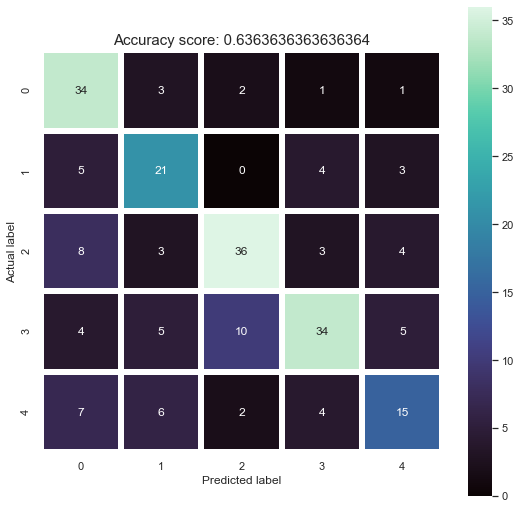

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matr_pca = confusion_matrix(label_test, label_pred_rf_pca)
acc_pca = accuracy_score(label_test, label_pred_rf_pca)

plt.figure(figsize = (9,9))
sns.heatmap(conf_matr_pca, annot = True, fmt = ".0f", linewidths = 5, square = True, cmap = 'mako');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(acc_pca)
plt.title(all_sample_title, size = 15)

# Conclusions


Our analysis shows that the best results are reached by the Random Forest algorithm after the application of PCA (accuracy = 0.6318). Principal Component Analysis is very useful to speed up the computation by reducing the dimensionality of the data. Plus, when you have high dimensionality with high correlated variable of one another, as in our case, the PCA can improve the accuracy of classification model.